# Esercizio 1



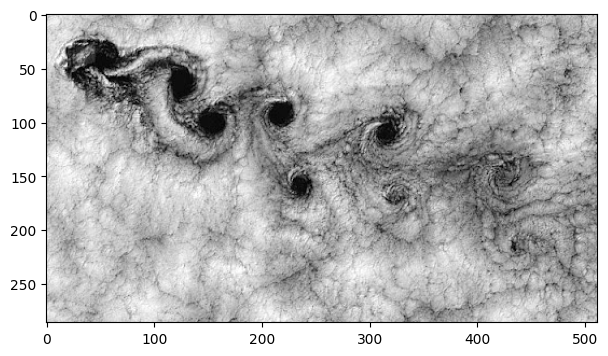

In [32]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [8,4]
A = imread(os.path.join('./sample_data/','Karman_vortex.jpg'))
X = np.mean(A,-1); # Convert RGB to grayscale
img = plt.imshow(X)
img.set_cmap('gray')
plt.show()


## PUNTO 1

In [33]:
# Compute the economy SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)



## PUNTO 2

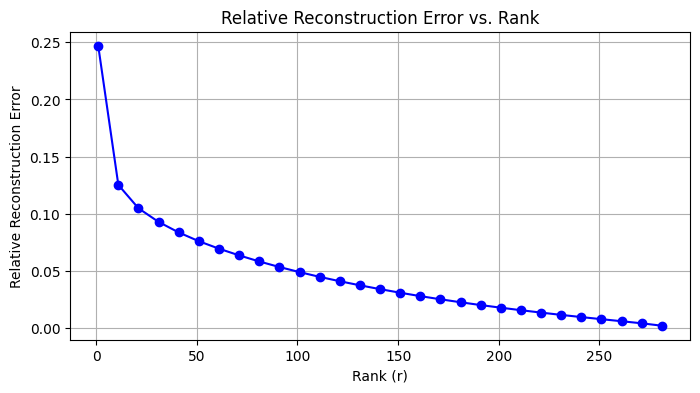

In [34]:
# Compute the true Frobenius norm of X
norm_X = np.linalg.norm(X, 'fro')

# Range of ranks to consider
ranks = np.arange(1, min(X.shape), 10)

# Initialize an array to store relative reconstruction errors
rel_errors = []

# Compute relative reconstruction error for each rank
for r in ranks:
    # Compute the economy SVD
    U, S, VT = np.linalg.svd(X, full_matrices=False)

    # Truncate the singular values and vectors to rank r
    Ur = U[:, :r]
    Sr = np.diag(S[:r])
    VTr = VT[:r, :]

    # Compute the approximation of rank r
    X_approx = Ur @ Sr @ VTr

    # Compute the Frobenius norm of the difference between X and X_approx
    norm_diff = np.linalg.norm(X - X_approx, 'fro')

    # Compute the relative reconstruction error
    rel_error = norm_diff / norm_X

    # Store the relative reconstruction error
    rel_errors.append(rel_error)

# Plot the relative reconstruction error as a function of rank r
plt.plot(ranks, rel_errors, marker='o', linestyle='-', color='b')
plt.xlabel('Rank (r)')
plt.ylabel('Relative Reconstruction Error')
plt.title('Relative Reconstruction Error vs. Rank')
plt.grid(True)
plt.show()

## PUNTO 3

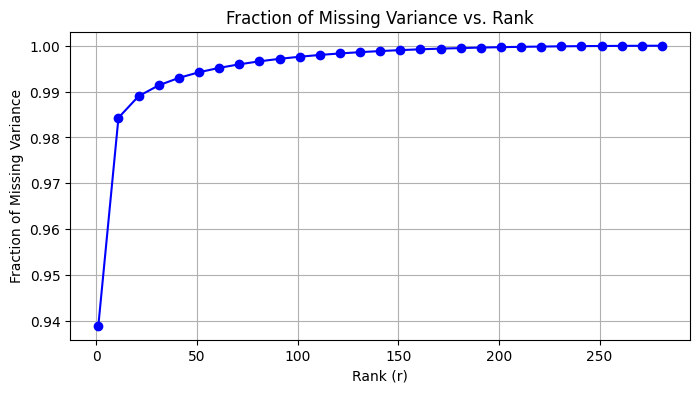

In [35]:
# Initialize an array to store the fraction of missing variance
missing_variance = []

# Compute fraction of missing variance for each rank
for r in ranks:
    # Compute the economy SVD
    U, S, VT = np.linalg.svd(X, full_matrices=False)

    # Truncate the singular values and vectors to rank r
    Ur = U[:, :r]
    Sr = np.diag(S[:r])
    VTr = VT[:r, :]

    # Compute the approximation of rank r
    X_approx = Ur @ Sr @ VTr

    # Compute the Frobenius norm of the difference between X and X_approx
    norm_diff = np.linalg.norm(X - X_approx, 'fro')

    # Compute the relative reconstruction error
    rel_error = norm_diff / norm_X

    # Compute the fraction of missing variance
    fraction_missing_variance = 1 - rel_error**2

    # Store the fraction of missing variance
    missing_variance.append(fraction_missing_variance)

# Plot the fraction of missing variance as a function of rank r
plt.plot(ranks, missing_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Rank (r)')
plt.ylabel('Fraction of Missing Variance')
plt.title('Fraction of Missing Variance vs. Rank')
plt.grid(True)
plt.show()

## PUNTO 4

In [36]:
# iterate through the computed fraction of missing variance and identify the smallest rank r_
# such that the fraction of missing variance is less than 1% (or 0.01).

# Initialize an array to store the fraction of missing variance
missing_variance = []

# Compute fraction of missing variance for each rank
for r in ranks:
    # Compute the economy SVD
    U, S, VT = np.linalg.svd(X, full_matrices=False)

    # Truncate the singular values and vectors to rank r
    Ur = U[:, :r]
    Sr = np.diag(S[:r])
    VTr = VT[:r, :]

    # Compute the approximation of rank r
    X_approx = Ur @ Sr @ VTr

    # Compute the Frobenius norm of the difference between X and X_approx
    norm_diff = np.linalg.norm(X - X_approx, 'fro')

    # Compute the relative reconstruction error
    rel_error = norm_diff / norm_X

    # Compute the fraction of missing variance
    fraction_missing_variance = 1 - rel_error**2

    # Store the fraction of missing variance
    missing_variance.append(fraction_missing_variance)

    # Check if the fraction of missing variance is less than 1% (0.01)
    if fraction_missing_variance < 0.01:
        break

# Find the rank r_tilde for which the reconstruction captures 99% of the total variance
rank_tilde = ranks[np.argmax(missing_variance)]

print("Rank (r_tilde) for 99% of total variance:", rank_tilde)

Rank (r_tilde) for 99% of total variance: 281


# ESERCIZIO 2

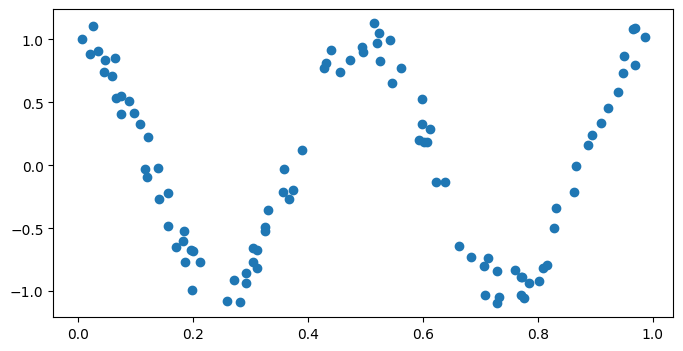

In [38]:
# Set a seed for reproducibility
np.random.seed(42)

# Generate 100 random data points
num_points = 100
x_values = np.random.rand(num_points)
epsilon_values = np.random.uniform(low=-0.2, high=0.2, size=num_points)

# Generate y values using the given formula with added random noise
y_values = np.cos(4 * np.pi * x_values) + epsilon_values

plt.scatter(x_values, y_values)

In [11]:
def polynomial_features(x, degree):
    # Generate polynomial features up to the specified degree
    return np.column_stack([x**i for i in range(degree + 1)])

In [12]:
def sgd(X, y, learning_rate=0.001, alpha=0.9, max_iters=1000, tol=1e-4):
    num_samples, num_features = X.shape
    # Initialize coefficients randomly in the range [-0.4, 0.4]
    coefficients = np.random.uniform(low=-0.4, high=0.4, size=num_features)
    # Initialize momentum to zero
    momentum = np.zeros_like(coefficients)

    # Perform SGD
    for iteration in range(max_iters):
        # Shuffle data for stochasticity
        indices = np.random.permutation(num_samples)
        X_shuffled, y_shuffled = X[indices], y[indices]

        for i in range(num_samples):
            # Compute predicted y
            y_pred = np.dot(X_shuffled[i], coefficients)
            # Compute gradient
            gradient = 2 * (y_pred - y_shuffled[i]) * X_shuffled[i]
            # Update coefficients using momentum
            momentum = alpha * momentum + learning_rate * gradient
            coefficients -= momentum

        # Check convergence
        if np.linalg.norm(gradient) < tol:
            break

    return coefficients

In [13]:
def predict(X, coefficients):
    return np.dot(X, coefficients)

In [16]:
def plot_results(x_values, y_values, coefficients, degree, learning_rate, alpha):
    # Create a smaller plot
    plt.figure(figsize=(6, 4))

    # Plot the true data points
    plt.scatter(x_values, y_values, label='Generated Data', s=10)

    # Generate polynomial features for plotting
    x_plot = np.linspace(0, 1, 100)
    X_plot = polynomial_features(x_plot, degree)

    # Predict using learned coefficients
    y_plot = predict(X_plot, coefficients)

    # Plot the learned polynomial
    plt.plot(x_plot, y_plot, label=f'Degree {degree}, η={learning_rate}, α={alpha}', linewidth=2)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Polynomial Regression using SGD')
    plt.legend()
    plt.show()


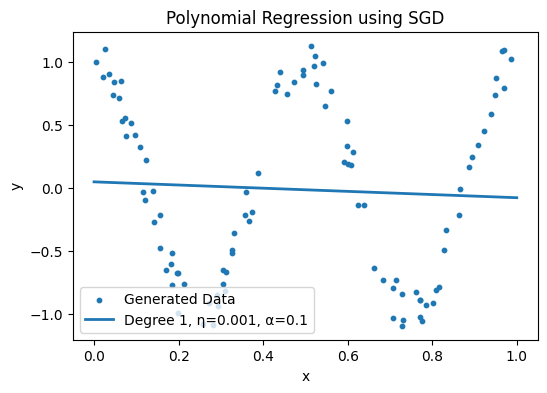

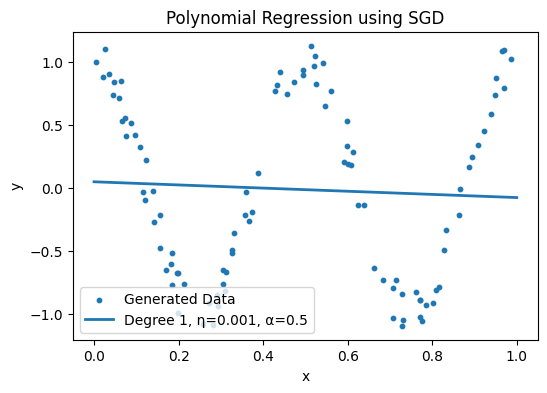

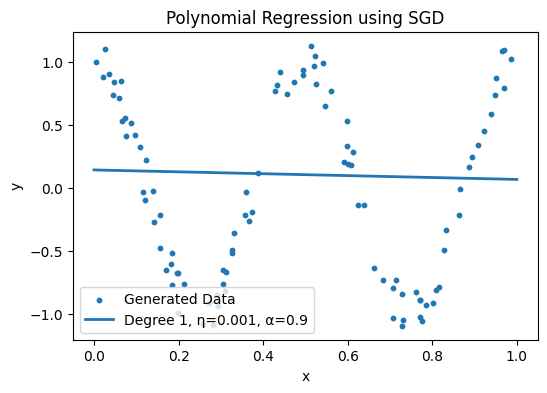

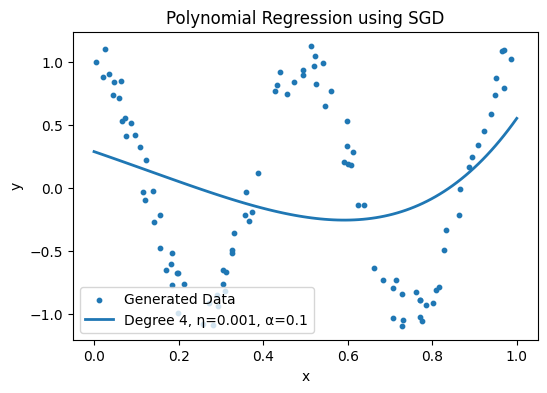

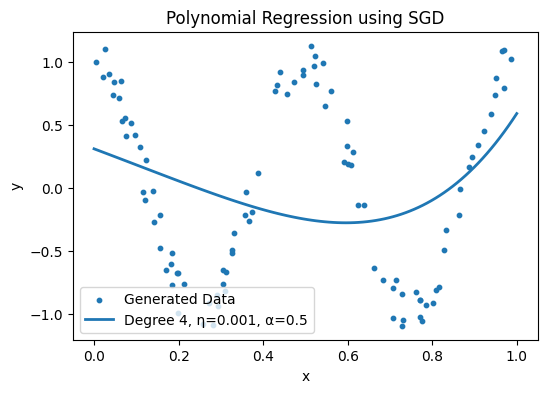

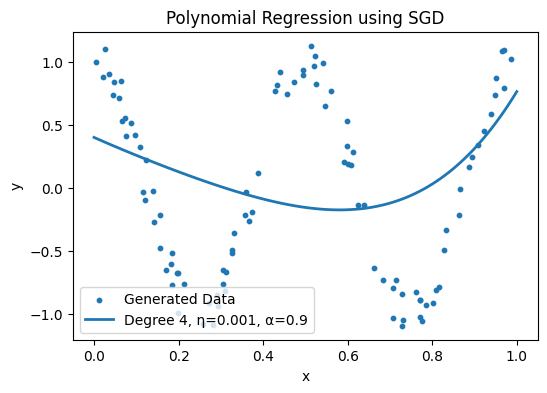

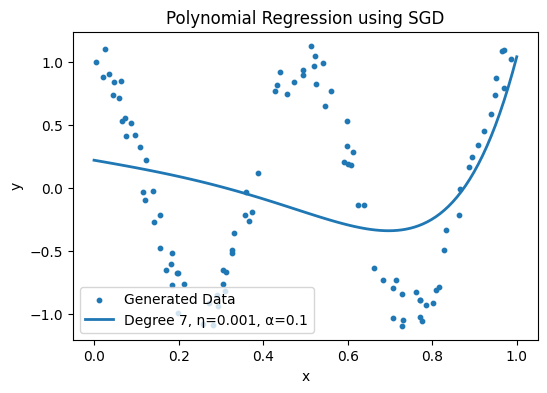

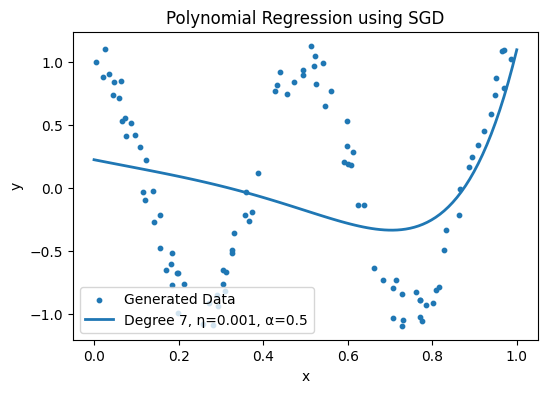

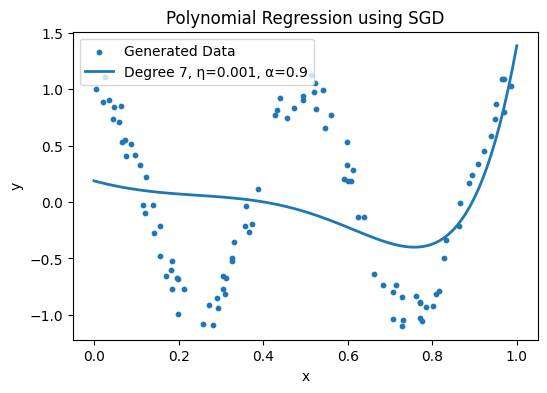

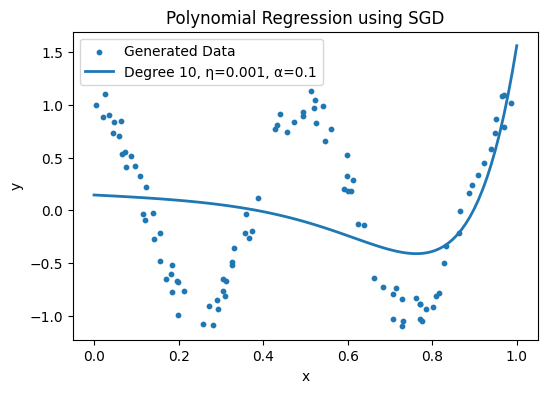

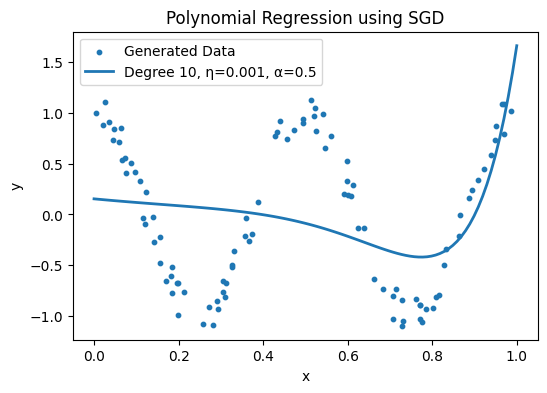

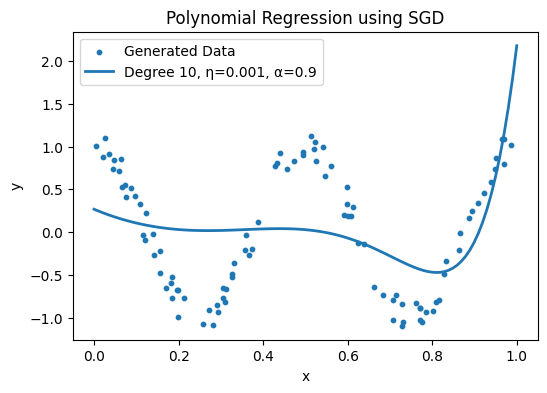

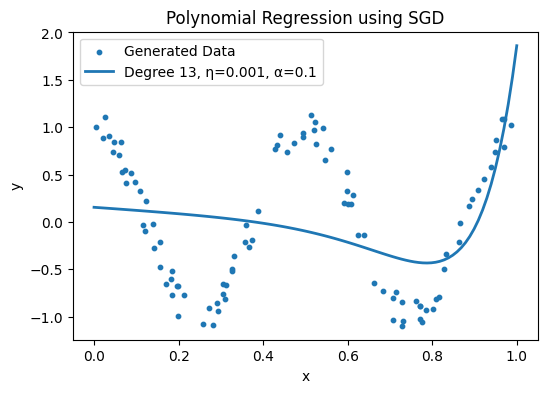

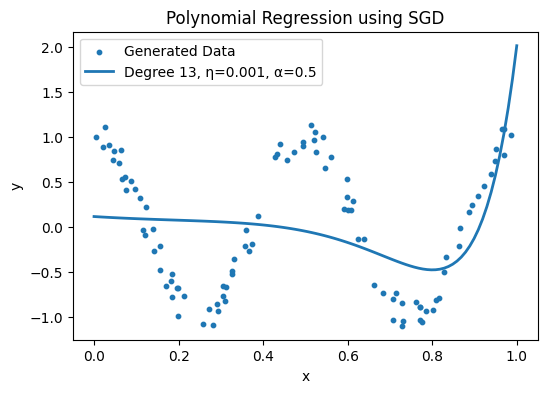

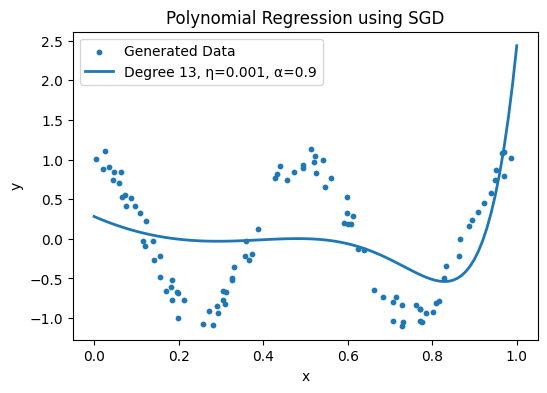

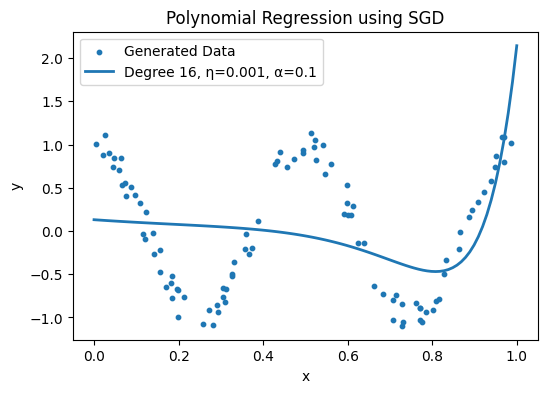

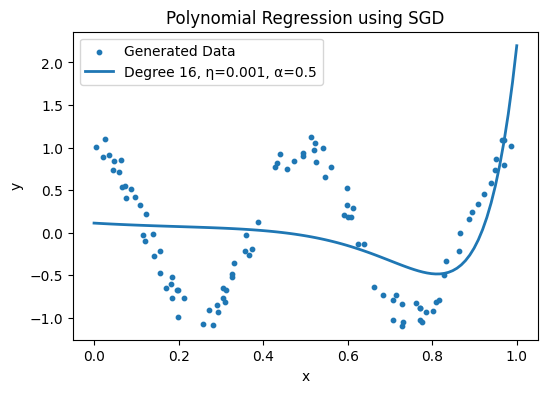

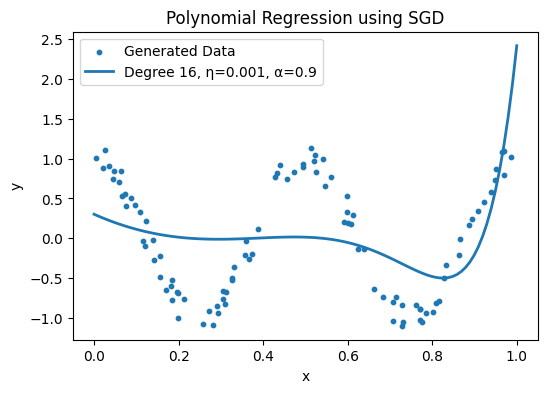

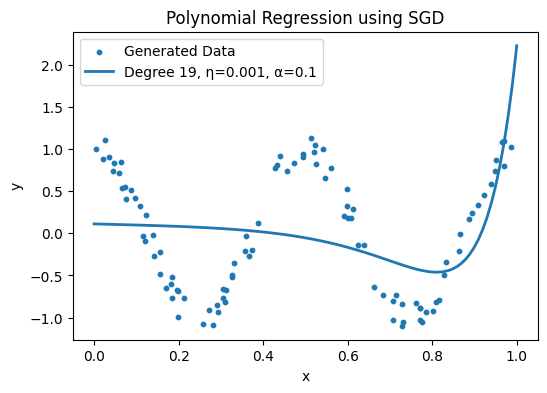

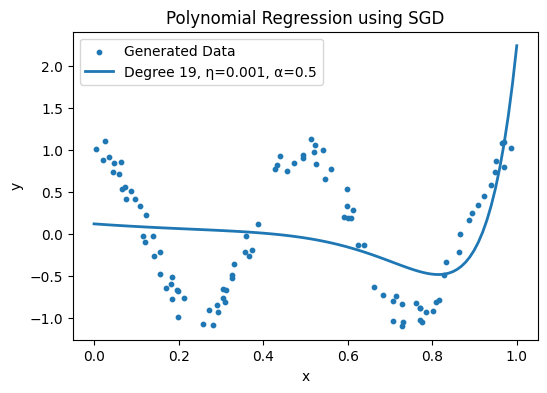

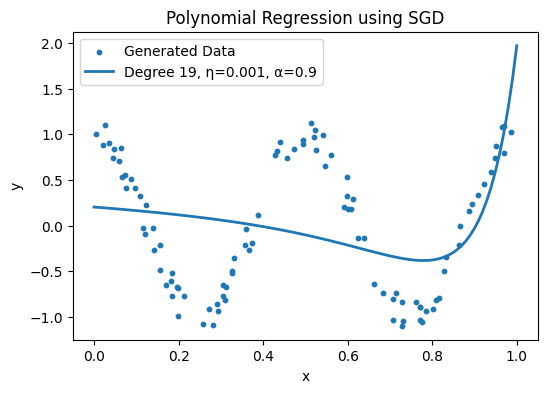

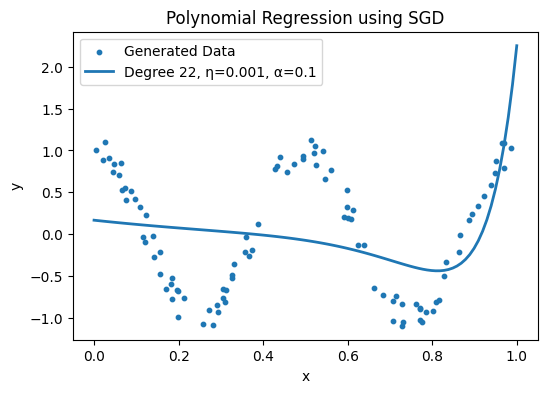

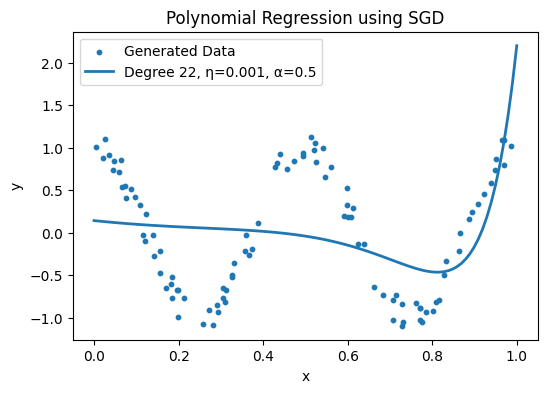

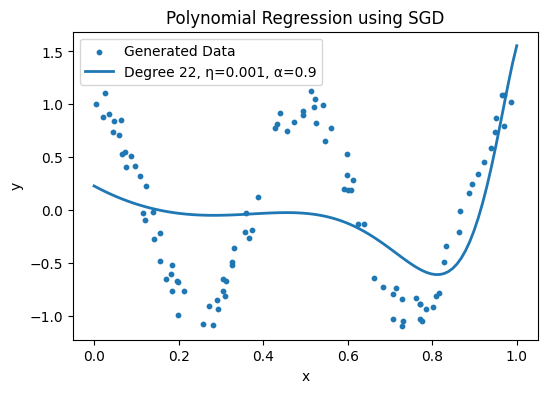

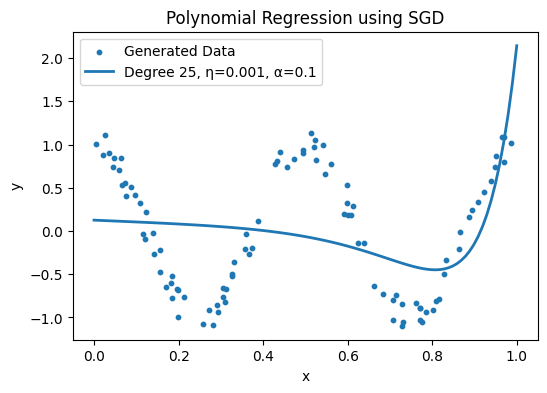

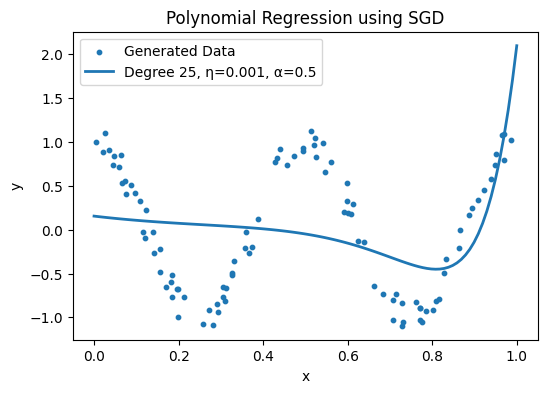

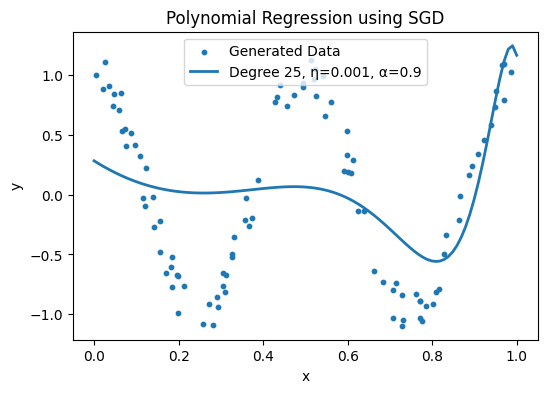

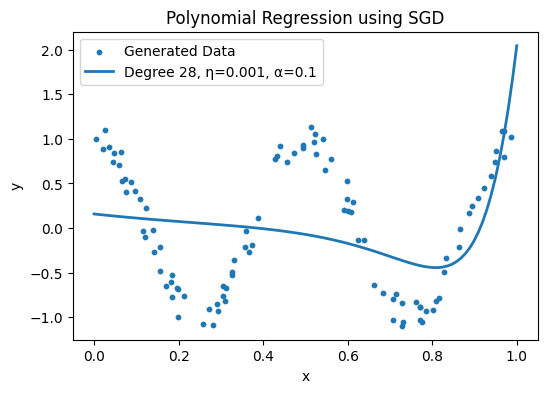

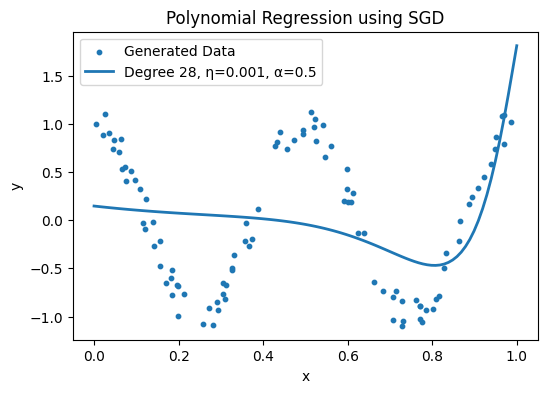

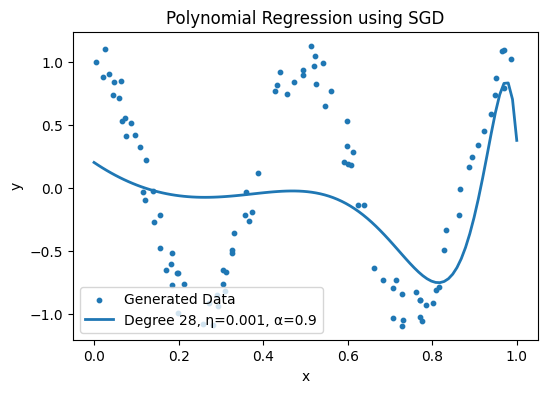

In [26]:
# Maximum degree of the polynomial
max_degree = 30

# Learning rate
learning_rate = 0.001

# Momentum parameter (alpha)
alpha_values = [0.1, 0.5, 0.9]

# Try different degrees and alphas
for degree in range(1, max_degree + 1,3):
    for alpha in alpha_values:
        # Generate polynomial features
        X = polynomial_features(x_values, degree)

        # Perform SGD
        coefficients = sgd(X, y_values, learning_rate=learning_rate, alpha=alpha)

        # Plot the results
        plot_results(x_values, y_values, coefficients, degree, learning_rate, alpha)

**LAST GRAPH:**

The graph shows that the polynomial regression model is able to fit the data points fairly well. The error between the model and the data points is small, and the model is able to capture the general trend of the data. However, the model is also a bit wiggly, which suggests that it may be overfitting the data. This is because the polynomial of degree 5 is a very flexible model, and it can fit the data points very closely, even if there is not a true underlying relationship between the independent variable (x) and the dependent variable (y).

The learning rate is an important parameter that controls how quickly the algorithm learns. If the learning rate is too high, the algorithm will converge to a suboptimal solution. If the learning rate is too low, the algorithm will converge slowly. The value of α that was used in this case seems to be a good choice, as the algorithm was able to converge to a good solution in a reasonable amount of time.

**FIRST GRAPH**

In contrast, the graph for polynomial regression with degree 1 and alpha = 0.1 shows a horizontal line, essentially a linear model. This simple model may not capture the complexity of the underlying data pattern. The horizontal line suggests that the model is struggling to fit the data, and it might be underfitting. The learning rate (alpha) of 0.1 is relatively low, which could contribute to slow convergence, and it might require tuning.

**GENERAL COMMENT**
- The choice of polynomial degree significantly affects the model's complexity. Higher degrees lead to more flexible models that can fit the training data very closely, but they are also more susceptible to overfitting. Lower degrees may result in underfitting, where the model is too simplistic to capture the underlying patterns.
- The momentum parameter influences the convergence speed of the stochastic gradient descent algorithm. A higher α enhances the momentum effect, which can help escape local minima but may also make the model more sensitive to noise in the training data.

# ESERCIZIO 3

In [41]:
import sympy as sp

# Define symbols
w, b, x, z, eta = sp.symbols('w b x z eta')

# Sigmoid function
y = 1 / (1 + sp.exp(-w * x - b))

# Cost function
J = 0.5 * (y - z)**2

# Gradients
dw = sp.diff(J, w)
db = sp.diff(J, b)

# Gradient descent iteration
w_new = w - eta * dw
b_new = b - eta * db

w_new

-1.0*eta*x*(-z + 1/(exp(-b - w*x) + 1))*exp(-b - w*x)/(exp(-b - w*x) + 1)**2 + w